3. ネットワークの特徴量
中心性、クラスタ係数、次数分布など、ネットワークの性質を理解する上で必要な特徴量について説明します。

3.1 隣接行列、辺リスト

ネットワーク(グラフ)は頂点(ノード)と、それをつなぐ辺(エッジ、リンク)によって構成されます。例えばA, B, C, D, E, Fの6つの頂点から構成されるネットワークは以下のように表すことができます。

以下のコードは5行からなり、1行目はNetworkXのライブラリを読み込んで、以下のプログラム中でnxの表記でライブラリを使用できるようにします。
2行目では、頂点も辺もない空のネットワークGを作ります。
3行目では、頂点A, B, C, D, E, FをネットワークGに追加します。
4行目では、辺A-B, B-C, B-D, C-D, A-E, C-E, C-FをネットワークGに追加します。
5行目では、ネットワークGを描画します。頂点の大きさや色、頂点のラベルを表示するか否かなどを指定することができます。



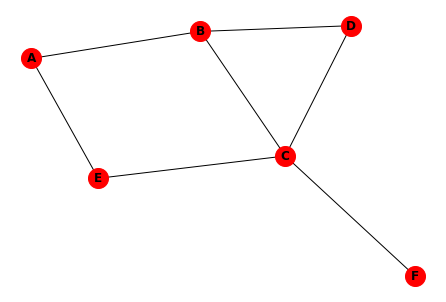

In [0]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

上の例では頂点をAからFの記号で表しましたが、数で表すこともできます。頂点が0から始まることに気をつけてください。大規模なネットワークを人工的に生成する場合はこの方が便利です。

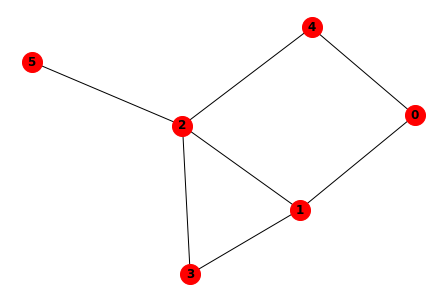

In [0]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([i for i in range(6)])
G.add_edges_from([(0,1),(1,2),(1,3),(2,3),(2,5),(0,4),(2,4)])
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

ネットワークを表すデータ構造として、これまでは辺リストを用いましたが、その他に隣接行列(adjacency matrix)がよく用いられます(図3--1)。ネットワークの頂点の数を$n$とすると、隣接行列は$n\times n$の正方行列で、頂点$i$と頂点$j$が辺で結ばれているならば行列の$(i,j)$成分は1、それ以外ば0となります。
上記のネットワークは、以下のような$6\times6$の隣接行列によって表されます。NetworkXの内部では疎行列として保持しているため、todenseで変換することによって、通常の行列として表示することができます。

In [0]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
print("number of nodes=", G.number_of_nodes())
print(G.nodes())
print("number of edges=", G.number_of_edges())
print(G.edges())
print("sparse adjacency matrix:\n", nx.adjacency_matrix(G))
print("dense adjacency matrix:\n", nx.adjacency_matrix(G).todense())

number of nodes= 6
['A', 'B', 'C', 'D', 'E', 'F']
number of edges= 7
[('A', 'B'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('C', 'F')]
sparse adjacency matrix:
   (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 2)	1
  (5, 2)	1
dense adjacency matrix:
 [[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


これらのプログラムは実行する毎に表示される各頂点の位置が変わりますが、ネットワークの構造としては同じです。描画方法としては、例えば以下のように、頂点をランダムに配置するもの、円周上に配置するもの、バネモデルによって配置するものなどがあります。複数の描画方法を横に並べて比較することもできます。以下のプログラムではグラフ描画のためのライブラリであるmatplotlibもインポートしています。

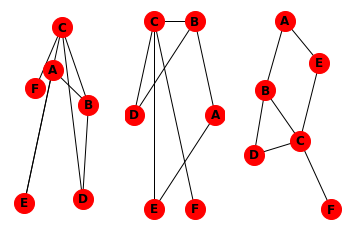

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
plt.subplot(131)
nx.draw_random(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(132)
nx.draw_circular(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(133)
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

ネットワーク中の頂点の数や頂点のリスト、辺の数や辺のリストはそれぞれnumber_of_nodes、nodes、number_of_edges、edgesを用いて表示することができます。以下のプログラムで例を示します。

In [0]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
print("number of nodes:", G.number_of_nodes())
print(G.nodes())
print("number of edges:", G.number_of_edges())
print(G.edges())

number of nodes: 6
['A', 'B', 'C', 'D', 'E', 'F']
number of edges: 7
[('A', 'B'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('C', 'F')]


3.2 次数

ネットワークの頂点の次数とは、その頂点につながる辺の数を表します。次数ごとにその次数をもつ頂点数を表したものは次数分布と言います。ネットワークの性質を分析する際に、次数分布はとても重要です。上記のネットワークの例では、次数0の頂点が0個、次数1の頂点が1個、次数2の頂点が3個、次数3の頂点が1個、次数4の頂点が1個であるため、次数列は[0,1,3,1,1]となります。

プログラム中のnx.degree_histogram(G)は、ネットワークの次数分布を棒グラフで表示します。x軸は次数を、y軸はその次数を持つ頂点の数(あるいはその割合)を表しています。この例では、次数0の頂点が1つ、次数1の頂点が3つ、次数2の頂点が0、次数3の頂点が1つであることを示しています。

またnx.info(G)は、ネットワークGの大まかな情報を表示します。具体的には、ネットワークの名前、タイプ(辺に向きがあるかないかなど)、頂点の数、辺の数、平均次数を表示します。

degree: [('A', 2), ('B', 3), ('C', 4), ('D', 2), ('E', 2), ('F', 1)]
[0, 1, 3, 1, 1]
Name: 
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333


(array([1., 0., 0., 3., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

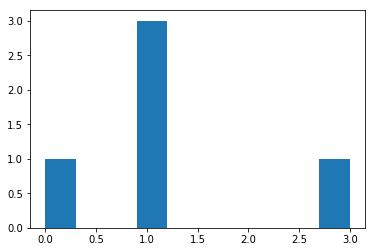

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
print("degree:", G.degree())
print(nx.degree_histogram(G))
print(nx.info(G))
plt.hist(nx.degree_histogram(G))

3.3 有向グラフ

ネットワークの辺に向きがあるものを有向グラフ、そうでないものを無向グラフといいます。Webページのハイパーリンクや論文の参照関係など、向きのある関係を表すときに有向グラフを用います。以下のプログラムでは、nx.info(G)でネットワークの情報を表示した際に、平均次数が2つ表示されます。辺に向きがあるため、頂点に入ってくる入次数(in degree)と、頂点から出ていく出次数(out degree)の2つがあり、それぞれの平均が表示されるためです。

Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 7
Average in degree:   1.1667
Average out degree:   1.1667


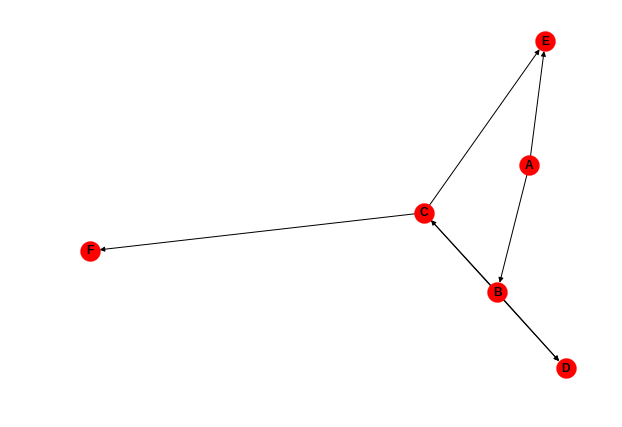

In [0]:
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print(nx.info(G))

3.4 共引用・書誌結合

有向グラフを無向グラフに変換する方法として、共引用(co-citation)と書誌結合(bibliographic coupling)があります(図3-3)。前者は、他の頂点から複数の頂点への有向辺があるときにその複数の頂点同士を無向辺でつないで得られます。以下の例では頂点EとFの両方への有向辺をもつ頂点が3つ(A,B,C)存在するので、EとFの間を重み3の辺でつないだ無向グラフが得られます。



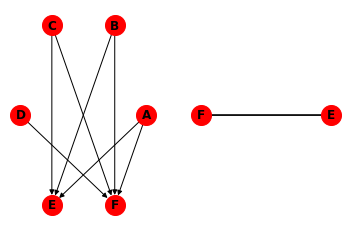

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","E"),("A","F"),("B","E"),("B","F"),("C","E"),("C","F"),("D","F")])
plt.subplot(121)
nx.draw_circular(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
GC = nx.MultiGraph()
GC.add_nodes_from(["E","F"])
GC.add_edges_from([("E","F"),("E","F"),("E","F")])
plt.subplot(122)
nx.draw_circular(GC, node_size=400, node_color='red', with_labels=True, font_weight='bold')


書誌結合はその逆で、同じ頂点への有向辺をもつ頂点が複数あるとき、その複数の頂点同士を無向辺でつないで得られます。以下の例では頂点AとBから、他の共通の頂点(D,E,F)への有向辺が存在するので、AとBの間を重み3の辺で結んだ無向グラフが得られます。

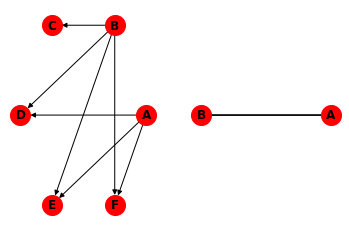

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","D"),("A","E"),("A","F"),("B","C"),("B","D"),("B","E"),("B","F")])
plt.subplot(121)
nx.draw_circular(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
GB = nx.MultiGraph()
GB.add_nodes_from(["A","B"])
GB.add_edges_from([("A","B"),("A","B"),("A","B")])
plt.subplot(122)
nx.draw_circular(GB, node_size=400, node_color='red', with_labels=True, font_weight='bold')


このような変換は、隣接行列の掛け算によって求めることができます。共引用を例にとると、元のネットワークの隣接行列$A$としたとき、その転置行列$Ａ^{T}$と$A$との積を求め、その対角成分を0としたものが共引用の隣接行列です。それとは逆に$A$と$A^{T}$との積を求め、その対角成分を0としたものが書誌結合の隣接行列です。以下のプログラム中でtransposeは転置行列を求める関数です。またdiagは対角成分のリストを返す関数ですが、二重に使うとそれを対角成分に持つ行列を返します。

In [0]:
import networkx as nx
import numpy as np
G = nx.DiGraph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","E"),("A","F"),("B","E"),("B","F"),("C","E"),("C","F"),("D","F")])
print("sparse adjacency matrix:\n",nx.adjacency_matrix(G))
print("dense adjacency matrix:\n",nx.adjacency_matrix(G).todense())
A = nx.adjacency_matrix(G).todense()
AT = A.transpose()
M = np.dot(AT,A)
M = M - np.diag(np.diag(M)) # diagonal elements = 0
print(M)

sparse adjacency matrix:
   (0, 4)	1
  (0, 5)	1
  (1, 4)	1
  (1, 5)	1
  (2, 4)	1
  (2, 5)	1
  (3, 5)	1
dense adjacency matrix:
 [[0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 3]
 [0 0 0 0 3 0]]


3.5 パス

無向グラフ$G=(V,E)$において、頂点Aと辺でつながっている他の頂点に移ることを繰り返して、最終的に頂点Bに到着したとき、この辺集合を頂点Aと頂点Bの間のパスと呼ぶ。パス中の辺の数をパスの長さ(length)と呼ぶ。与えられた無向グラフにおいて、2頂点間の長さ$r$のパスの有無は、隣接行列の積によって調べることができる。無向グラフ$G$の隣接行列を$A$としたとき、その行列同士の積$A^{2}$の$(i,j)$成分は頂点$i$と頂点$j$との長さ2のパスの数を表している。ただし$(i,i)$成分は頂点$i$から他の頂点に移ってまた戻ってくる場合の数を表しており、頂点$i$の次数$k_{i}$に等しい。同様に$A^{3}$の$(i,j)$成分は頂点$i$と頂点$j$を結ぶ長さ3のパスの数を表している。例えば頂点Aと頂点Bの間の長さ3のパスを考えたとき、$A^{3}(1,2)=5$であるが、これはA-E-C-B, A-E-A-B, A-B-D-B, A-B-C-B, A-B-A-Bの5つのパスを表している。

adjacency matrix A:
 [[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]
A * A:
 [[2 0 2 1 0 0]
 [0 3 1 1 2 1]
 [2 1 4 1 0 0]
 [1 1 1 2 1 1]
 [0 2 0 1 2 1]
 [0 1 0 1 1 1]]
degree: [('A', 2), ('B', 3), ('C', 4), ('D', 2), ('E', 2), ('F', 1)]
A * A * A:
 [[0 5 1 2 4 2]
 [5 2 7 4 1 1]
 [1 7 2 5 6 4]
 [2 4 5 2 2 1]
 [4 1 6 2 0 0]
 [2 1 4 1 0 0]]


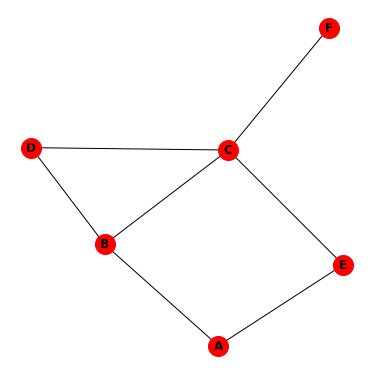

In [0]:
import networkx as nx
import numpy as np
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
plt.figure(figsize=(5, 5))
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("adjacency matrix A:\n",nx.adjacency_matrix(G).todense())

Z = nx.adjacency_matrix(G).todense()
print("A * A:\n",np.dot(Z,Z)) # or Z.dot(Z)
print("degree:",G.degree())
print("A * A * A:\n",np.dot(Z,np.dot(Z,Z)))

3.6 サイクル

サイクルが存在しないグラフを非循環グラフ(acyclic graph)と呼ぶ。
サイクルの最大長はそのグラフの頂点の数$n$以下であるから、$A$, $A^{2}$, $A^{3}$, ..., $A^{n}$の対角成分を全て調べればサイクルの有無は判定できるが、$n$が大きい場合は計算が困難である。
非循環グラフであるならばその隣接行列の全ての固有値が0であり、その逆も真であることから、隣接行列の固有値でサイクルの有無を判定できる。先のグラフの隣接行列の固有値は非零であり、サイクルが存在することが分かる。一方、サイクルが存在しないもうひとつのグラフにおいては、全ての固有値が0である。

以下のプログラムにおいては、隣接行列の固有値を計算するために、効率的な数値計算を行うためのライブラリであるNumPyをインポートしている。

cyclic: eigenvalues= [ 1.26716830e+00+0.j          2.60963880e-01+1.17722615j
  2.60963880e-01-1.17722615j -8.94548033e-01+0.53414855j
 -8.94548033e-01-0.53414855j -2.46519033e-32+0.j        ]
matrix([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0]], dtype=int64)
A: eigenvalues= [0. 0. 0. 0. 0. 0.]
matrix([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0]], dtype=int64)


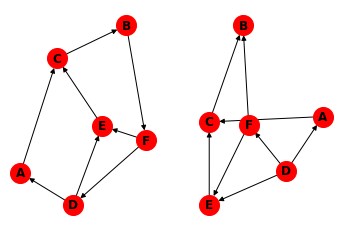

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from pprint import pprint
G = nx.DiGraph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","C"),("C","B"),("B","F"),("F","D"),("F","E"),("D","E"),("E","C"),("D","A")])
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
Z = nx.adjacency_matrix(G).todense()
w, v = LA.eig(Z)
print("cyclic: eigenvalues=", w)
pprint(Z)
GA = nx.DiGraph()
GA.add_nodes_from(["A","B","C","D","E","F"])
GA.add_edges_from([("A","C"),("C","B"),("F","B"),("D","F"),("F","E"),("D","E"),("E","C"),("D","A")])
plt.subplot(122)
nx.draw(GA, node_size=400, node_color='red', with_labels=True, font_weight='bold')
ZA = nx.adjacency_matrix(GA).todense()
wa, va = LA.eig(ZA)
print("A: eigenvalues=", wa)
pprint(ZA)

3.7 直径

グラフにおける直径(diameter)とは、グラフの任意の2頂点間の最短パス長の中で最大のものである。以下のグラフにおける直径は3である。

shortest path between A and F: ['A', 'B', 'C', 'F']
all shortest paths: [['A', 'B', 'C', 'F'], ['A', 'E', 'C', 'F']]
shortest path length: 3
diameter: 3


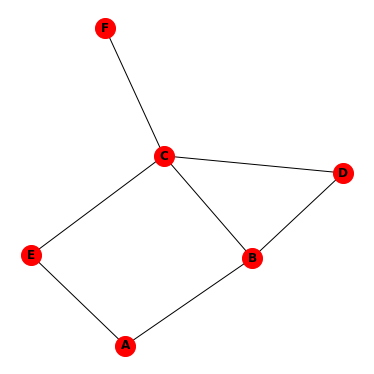

In [0]:
import networkx as nx
import numpy as np
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
plt.figure(figsize=(5, 5))
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

Z = nx.adjacency_matrix(G).todense()
print("shortest path between A and F:", nx.shortest_path(G,"A","F"))
print("all shortest paths:", [p for p in nx.all_shortest_paths(G,"A","F")])
print("shortest path length:", nx.shortest_path_length(G,"A", "F"))
print("diameter:" ,nx.diameter(G))

3.8 連結成分

グラフ上の任意の2頂点間のパスが存在するとき、そのグラフは連結であると言う。任意の2頂点間のパスが存在するような部分グラフを、そのグラフの連結成分と呼ぶ。グラフの連結成分の個数は、グラフラプラシアンの固有値が0となるものの個数で求められる。
グラフラプラシアンについては後述するが、グラフの隣接行列を$A$、各頂点の次数を対角成分に持つ対角ベクトルを$D$としたとき、$L=D-A$で求められる行列である。各要素が1の長さ$n$の列ベクトル$1$に対して$L\cdot1=0\cdot1$であることから、任意のグラフのグラフラプラシアンは少なくとも1つの固有値0を持つ。連結成分が複数あるグラフでは、そのグラフラプラシアンは複数の固有値0を持つ。以下の例では辺を取り除いて連結成分が2となったグラフにおいては、そのグラフラプラシアンが2つの固有値0を持つことがわかる。

no. of connected components: 1
Laplacian matrix L:
 [[ 2 -1  0  0 -1  0]
 [-1  3 -1 -1  0  0]
 [ 0 -1  4 -1 -1 -1]
 [ 0 -1 -1  2  0  0]
 [-1  0 -1  0  2  0]
 [ 0  0 -1  0  0  1]]
eigenvalues [5.269 3.865 2.534 -0.000 0.882 1.451]
some edges are deleted
no. of connected components: 2
Laplacian matrix L:
 [[ 2 -1  0  0 -1  0]
 [-1  1  0  0  0  0]
 [ 0  0  2 -1  0 -1]
 [ 0  0 -1  1  0  0]
 [-1  0  0  0  1  0]
 [ 0  0 -1  0  0  1]]
eigenvalues [3.000 -0.000 1.000 3.000 1.000 -0.000]


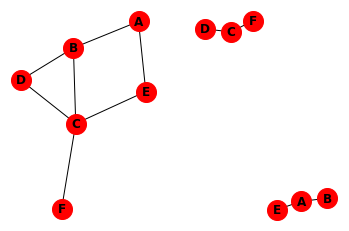

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from pprint import pprint
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("no. of connected components:", nx.number_connected_components(G))
L = nx.laplacian_matrix(G).todense()
print("Laplacian matrix L:\n",L)
np.set_printoptions(formatter={'float': '{:.3f}'.format}) #format of printing eigenvalues
print("eigenvalues", LA.eigvals(L))
print("some edges are deleted")
G.remove_edges_from([("B","C"),("B","D"),("C","E")])
plt.subplot(122)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("no. of connected components:", nx.number_connected_components(G))
L = nx.laplacian_matrix(G).todense()
print("Laplacian matrix L:\n", L)
print("eigenvalues", LA.eigvals(L))

3.9 クラスタ係数

例えばAさんとBさんが友人で、BさんとCさんが友人ならば、AさんとCさんも友人であることが多い。社会ネットワークにおいては、3人がお互いに友人であるような(A-B-C-Aのような)三角形(長さ3の閉路)を数多く含んでいることが多い。一方、木構造のように閉路を含まないネットワークもある。
クラスタ係数は「ある人の2人の友人が友人同士である割合」を表す。クラスタ係数には2種類の定義があるが、ここではlocal clustering coefficientについて述べる。頂点$i$の次数を$k_{i}$としたとき、頂点$i$の友人のペアの総数は$\frac{k_{i}(k_{i}-1)}{2}$あり、その中で辺で結ばれたものの割合を頂点$i$に関するクラスタ係数$C_{i}$と呼ぶ。

頂点$i$の隣接頂点間のつながり具合を表す指標としてredundancy($R_{i}$)がある。これは頂点$i$の隣接頂点について、頂点$i$の他の隣接頂点と辺でつながっているものの数の平均である。これを用いると、上記の「頂点$i$の友人ペアの中で辺で結ばれたものの数」は$\frac{1}{2}k_{i}R_{i}$であることから、$C_{i}$は以下のように表すことができる。

$C_{i}=\frac{\frac{1}{2}k_{i}R_{i}}{\frac{1}{2}k_{i}(k_{i}-1)}=\frac{R_{i}}{k_{i}-1}$

$C_{i}$を、ネットワークの全ての頂点で平均をとった$C_{WS}=\frac{1}{n}\sum_{i}^{n}C_{i}$をネットワーク全体のクラスタ係数と呼ぶ。クラスタ係数は0から1の値をとる。以下の例では、完全グラフのクラスタ係数は1、2部グラフのクラスタ係数は0、ランダムグラフのクラスタ係数は(辺の密度によるが)0から1の間の比較的小さい値をとる。2部グラフにおいては長さ3の閉路が存在しないのでクラスタ係数が0になるのは明らかである。またランダムグラフのクラスタ係数が比較的小さいのは、2頂点の間に辺が張られる確率が$p$に等しいからである。

もう一つのクラスタ係数の定義としては、各頂点に注目するのではなく、ネットワーク全体における長さ2のパス$N^{(2)}$の中でそのパスが閉路となるものの割合とするものである。三角形の個数を$L_{3}$とすると、3頂点からなる三角形1つは、長さ2のパスで閉路となるもの6つに対応するので $C = \frac{6 \cdot L_{3}}{|N^{(2)}|}$となる。これは先のクラスタ係数とは異なる定義である。クラスタ係数について述べる際には、どちらの定義を用いているかを明確にすることが必要である。

CC of complete graph 1.0
CC of bipartite graph 0
CC of random graph 0.13636363636363635


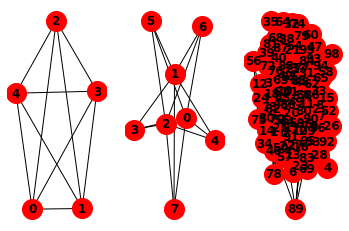

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

# complete graph
K_5 = nx.complete_graph(5)
plt.subplot(131)
nx.draw(K_5, node_size=400, node_color='red', with_labels=True, font_weight='bold')
# bipartite graph
K_3_5 = nx.complete_bipartite_graph(3, 5)
plt.subplot(132)
nx.draw(K_3_5, node_size=400, node_color='red', with_labels=True, font_weight='bold')
# random graph
plt.subplot(133)
er = nx.erdos_renyi_graph(100, 0.15)
nx.draw(er, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print("CC of complete graph", nx.clustering(K_5, 0))
print("CC of bipartite graph", nx.clustering(K_3_5, 0))
print("CC of random graph", nx.clustering(er, 0))

3.10 中心性

ネットワークにおける中心的な頂点を見つけたいことがしばしばある。与えられたネットワーク内で中心的な頂点を見つけることは、各頂点の重要度や全体に対する影響力を考えたりする上で極めて重要である。例えばTwitterなどのソーシャルメディアでフォロワーの人数を競ったりするのは、それが多いほど周囲への影響力が高く、重要であると考えられているためであり、これも中心性の指標の一つと言える。また、どこで火事が起こっても消防車が短時間で到達できるよう、消防署は管轄区域の中心に配置することが望ましいが、この場合の中心性は他の場所への到達可能性に基づいている。


他の多くの頂点とつながっている頂点、その頂点が欠けるとグラフがばらばらになるような頂点、多くの経路上に現れる頂点、他の頂点に短い距離で到達できる頂点など、中心性にはさまざまな定義がある。例えば図4-1のようなネットワークでの中心的な頂点はどれであろうか。各頂点の次数に注目した次数中心性(degree centrality)では、頂点Cが最も中心的である。他の頂点への距離が短いものを中心的とする近接中心性(closeness centrality)では、頂点Gが最も中心的である。次数中心性で、隣接頂点の中心性によって重みづけをした固有ベクトル中心性(eigenvector centrality)では、頂点Dが最も中心的である。2頂点間のパス上に最も出現するものを中心的とする媒介中心性(betweenness centrality)では、頂点Hが最も中心的である。

degree centrality:
C:0.4 D:0.3 G:0.3 H:0.3 I:0.3 E:0.2 F:0.2 A:0.1 B:0.1 J:0.1 K:0.1 

closeness centrality:
G:0.476 D:0.455 H:0.455 F:0.435 E:0.417 C:0.4 I:0.37 A:0.294 B:0.294 J:0.278 K:0.278 

eigenvector centrality:
D:0.447 G:0.435 C:0.42 H:0.36 E:0.328 F:0.309 I:0.196 A:0.161 B:0.161 J:0.075 K:0.075 

betweenness centrality:
H:0.485 C:0.396 I:0.378 G:0.337 D:0.304 F:0.133 E:0.122 A:0.0 B:0.0 J:0.0 K:0.0 



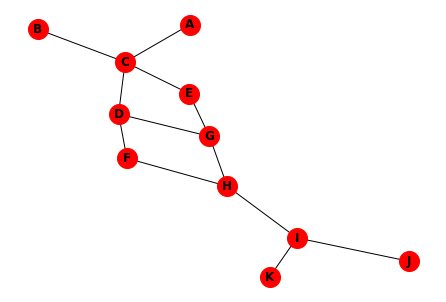

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from pprint import pprint

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"])
G.add_edges_from([("A", "C"), ("B", "C"), ("C", "D"), ("C", "E"), ("D", "F"), ("D", "G"), ("E", "G"), ("F", "H"), ("G", "H"), ("H", "I"), ("I", "J"), ("I", "K")])

nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("degree centrality:")
for k, v in sorted(nx.degree_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

print("closeness centrality:")
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

print("eigenvector centrality:")
for k, v in sorted(nx.eigenvector_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

print("betweenness centrality:")
for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

中心性の定義によって、さまざまな頂点が中心的となり得る。用途に応じて、さまざまな中心性の定義がこれまでに提案されている。また中心的な頂点は重要であると考えられることから、頂点を中心性の高い順に並べるランキングについてもさまざまなものが提案されている。そのいくつかについて以下の各節で述べる。

* 次数中心性

次数中心性は「多くの頂点と隣接している頂点は中心的」とするものであり、頂点$v$の次数中心性はその次数$k_{v}$で表される。グラフ$G=(V,E)$の全ての頂点の次数ベクトル$k$は、隣接行列$A$と、各要素が1である列ベクトル$1$を用いて$k=A\cdot1$で表せる。上記の例では、次数中心性で最大のものは次数4の頂点Cである。次数中心性は例えばtwitterでのフォロワー数に対応するものであり、単純で分かりやすい尺度ではあるが、隣接する頂点を全て同じ重みでカウントしてしまっている。

* 固有ベクトル中心性

先の次数中心性は全ての辺を平等にカウントして次数を求めているが、単に次数の高い頂点を中心的とするのでは、局所的な操作によって中心性をコントロールできてしまう可能性がある。例えば、特定の頂点につながる新たなダミー頂点を大量に作るなどして、その特定の頂点の中心性を容易に高めることができてしまう。

固有ベクトル中心性は隣接する頂点の中心性も加味し、「他の中心的な頂点と隣接する頂点は中心的」とするものである。周囲の頂点の中心性$x_{j}$から計算される$x^{'}_{i}$は
$x^{'}_{i}=\sum_{j}A_{ij}x_{j}$、列ベクトルと行列の積で表すと$x^{'}=A\cdot x$となる。初期ベクトルを適切に設定した上でこのような反復計算を繰り返すと、列ベクトル$x$は最終的に$A$の最大固有値に対応する固有ベクトル(主固有ベクトル)に収束する($Ax=\lambda x$)。得られた列ベクトル$x$の$i$番目の成分が頂点$i$の固有ベクトル中心性である。ただし初期ベクトルが零ベクトルであったり、他の固有ベクトルの定数倍であったり、主固有ベクトルに直交である場合はこの限りではない。収束に必要な反復計算の回数は、ネットワークの頂点数に比較して非常に少ないことが知られている。

一般に行列の固有ベクトルは複数ある。上記のような反復計算で主固有ベクトルに収束することは以下のように証明できる。初期ベクトル$x_{0}$を固有ベクトル$v_{i}$の線形結合として
$x(0)=\sum_{i}c_{i}v_{i}$
と表現する。これに隣接行列$A$を$t$回掛けると$x(t)=A^{t}\sum_{i}c_{i}v_{i}=\sum_{i}c_{i}\lambda_{i}^{t}v_{i}=\lambda_{1}^{t}\sum_{i}c_{i}(\frac{\lambda_{i}}{\lambda_{1}})^{t}v_{i}$
となる。ただし$\lambda_{i}$は行列$A$の固有値で、$\lambda_{1}$は最大の固有値である。$i\neq 1$の全ての$i$について$\frac{\lambda_{i}}{\lambda_{1}}< 1$であるから、$t \rightarrow \infty$のとき
$x(t)\rightarrow c_{1}\lambda_{1}^{t}v_{1}$に収束する。

* PageRank

固有ベクトル中心性において、辺に向きがある有向グラフの場合に、他のどの頂点からも辺が入ってこない(入次数が0の)頂点は、その中心性が0になってしまうという問題点がある。

その対策として、全ての頂点に一定量の中心性を加えたのがKatz中心性である。具体的には2つのパラメータ$\alpha$と$\beta$を導入して、頂点$i$の中心性$x_{i}$を$x^{'}_{i}=\alpha\sum_{j}A_{ij}x_{j}+\beta$とする。$\alpha$の値が0ならばすべての頂点の中心性が等しくなり、$\beta$の値が0ならば固有ベクトル中心性と同じになる。
列ベクトルと行列の積で表すと$x^{'}=\alpha A x + \beta 1$となる。ここで$1$は$n$個の要素が全て1の列ベクトルである。

このKatz中心性にも問題点がある。仮に中心性の高い頂点がひとつあると、それに隣接する頂点の中心性も全て高くなってしまう。これを解決するアプローチとして、頂点$i$の中心性を計算する際に、隣接する頂点$j$の中心性を単純に足すのでなく、その頂点の次数$k_{j}$で割ったものを足すことにする。式で表すと、頂点$i$の中心性$x_{i}$を$x^{'}_{i}=\alpha\sum_{j}A_{ij}\frac{x_{j}}{k_{j}}+\beta$で計算する。

列ベクトルと行列の積で表すと$x^{'}=\alpha A D^{-1} x + \beta 1$となる。ここで$D^{-1}$は各頂点の次数の逆数$\frac{1}{k_{i}}$を対角成分にもつ$n \times n$正方行列、$1$は$n$個の要素が全て1の列ベクトルである。

この中心性はGoogleの共同創業者のLarry Pageらによって考案されたものであり、PageRankと呼ばれる。PageRankは、Googleの初期の検索エンジンにおいて、ハイパーリンクで結ばれたWebページのネットワークの中から中心的なページを選ぶためのランキングアルゴリズムとして使用されていたとされている。







*  媒介中心性

これまでの中心性とは全く別の定義として、2頂点間を結ぶ経路上にしばしば現れる頂点を中心的とする考え方もある。
$n^{i}_{st}$は頂点$s$と$t$を結ぶパスが頂点$i$を通るときに1、そうでないときに0となるとしたとき、頂点$i$の媒介中心性$x_{i}$は$x_{i}=\sum_{st}n^{i}_{st}$と表すことができる。

次数が小さい頂点であっても、媒介中心性が大きい場合がある。例えば二つのグループとその間を結ぶブリッジから構成されるネットワークにおいては、一方のグループから他方のグループへのパスがすべてそのブリッジを経由するため、そのブリッジ上の頂点の媒介中心性は高くなる。

媒介中心性の性質として、値の取り得る範囲が広く、頂点のランキングをする際に明確な差をつけやすいことがあげられる。1つの頂点が残りの$n-1$個の各頂点への辺でつながっているネットワーク(スターグラフ)においては、中心の頂点の媒介中心性が$n^2-n+1$であり、それ以外の頂点の媒介中心性は$2n-1$となる。両者の比はおよそ$\frac{1}{2}$であり、大きな$n$のときは値の取り得る範囲が広い。


* 近接中心性

例えば街の消防署を設置する場所を決めるとすると、どの地点へも比較的短時間で到達可能ば場所に設置することが望ましい。近接中心性は、ネットワークの他の頂点との平均距離が短い頂点を中心とするものである。頂点$i$と頂点$j$の間の距離を$d_{ij}$とすると、$l_{i}=\frac{1}{n}\sum_{j}d_{ij}$が頂点$i$の近接中心性である。これまでの中心性とは違い、近接中心性は値が小さいものの方がより中心的である。従って、$l_{i}$の逆数$\frac{1}{l_{i}}=\frac{n}{\sum_{j}d_{ij}}$や、$d_{ij}$の逆数の平均$\frac{1}{n}\sum_{j}\frac{1}d_{ij}$を考え、これが大きいものを中心的と考えることもできる。非連結のネットワークにおいては$d_{ij}=\infty$となる頂点$i$と$j$が存在するが、後者の近接中心性の定義であれば$\frac{1}{\infty}=0$とすることでそのような非連結のネットワークに対しても適用できる。

近接中心性は値の取り得る範囲が狭いため、頂点のランキングをする際に明確な差をつけにくいことが知られている。
例えば4100万以上の頂点からなるtwitterネットワーク(http://konect.uni-koblenz.de/networks/twitter/) において、その直径(2頂点間の距離の最大値)は23であり、また近接中心性は正数であることから、4100万以上の全ての頂点の近接中心性が0から23の範囲の値を取ることになる。